# Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# Imports

In [2]:
from keras.models import load_model
import os
from PIL import Image
from keras.preprocessing import image
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.patches as patches

IMAGE_SIZE = 256

Using TensorFlow backend.


In [3]:
working_path = "/content/drive/My Drive/Dog_Breed/7_breeds/"
!ls "/content/drive/My Drive/Dog_Breed/7_breeds/data/test/"

beagle.jpg		pug.jpg		     Yorkshire_terrier.jpg
German_shepherd.jpg	Rottweiler.jpg
Labrador_retriever.jpg	standard_poodle.jpg


# Load models

In [0]:
def model_from_drive(model_path):
  model = load_model(working_path + model_path)
  return model

In [0]:
class_model = model_from_drive('models/ResNet50_300/ResNet50_300+100+400.h5')
regr_model = model_from_drive('models/Regression/regression_115.h5')

# Testing

In [42]:
labels = pd.read_csv(working_path + 'data/256_labels.csv')
breeds = np.unique(labels['class'])
breed_dictionary = {} 
for i in range(len(breeds)):
    breed_dictionary[i] = breeds[i]

breed_dictionary

{0: 'German_shepherd',
 1: 'Labrador_retriever',
 2: 'Rottweiler',
 3: 'Yorkshire_terrier',
 4: 'beagle',
 5: 'pug',
 6: 'standard_poodle'}

beagle.jpg

	beagle (1.0)

	German_shepherd (6.681641e-13)

	Labrador_retriever (5.3549304e-13)
Bboxes: x1  19.180443 y1  13.565408 x2  226.50058 y2  212.4397


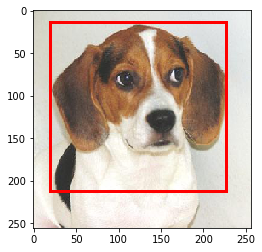

-----------------------------------------------------------

Yorkshire_terrier.jpg

	Yorkshire_terrier (0.998437)

	German_shepherd (0.0012143916)

	beagle (0.00034048385)
Bboxes: x1  54.26825 y1  36.918682 x2  215.17473 y2  214.6939


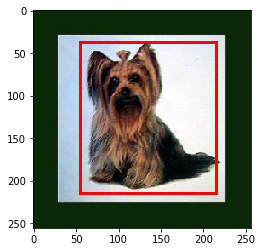

-----------------------------------------------------------

Labrador_retriever.jpg

	German_shepherd (0.5289997)

	pug (0.25237262)

	Yorkshire_terrier (0.09541217)
Bboxes: x1  35.546337 y1  -2.9128006 x2  229.82834 y2  251.30743


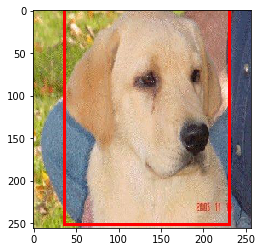

-----------------------------------------------------------

German_shepherd.jpg

	German_shepherd (0.99984765)

	pug (0.00015029842)

	Rottweiler (9.595195e-07)
Bboxes: x1  26.334896 y1  28.45672 x2  243.39464 y2  239.98158


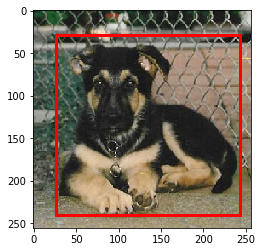

-----------------------------------------------------------

pug.jpg

	pug (1.0)

	Rottweiler (2.565886e-09)

	beagle (8.423335e-12)
Bboxes: x1  -0.026470268 y1  -6.165948 x2  237.4888 y2  249.857


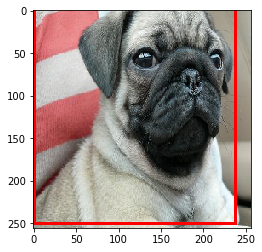

-----------------------------------------------------------

standard_poodle.jpg

	standard_poodle (0.99940836)

	German_shepherd (0.00024532355)

	Labrador_retriever (0.00012945545)
Bboxes: x1  24.219421 y1  12.029252 x2  225.78107 y2  247.8495


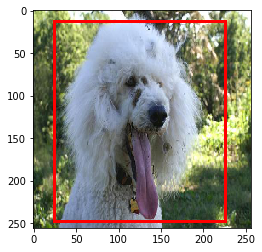

-----------------------------------------------------------

Rottweiler.jpg

	Rottweiler (1.0)

	Labrador_retriever (2.1013293e-09)

	German_shepherd (5.9652916e-10)
Bboxes: x1  49.160847 y1  77.11995 x2  150.55327 y2  191.7395


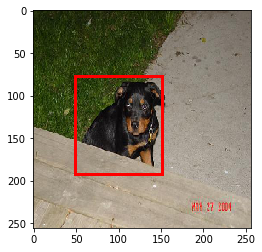

-----------------------------------------------------------



In [44]:
img_list = []
img_path = working_path + 'data/test/'
for file_name in os.listdir(img_path):
  img = cv2.imread(working_path + "data/test/" + file_name)
  img_1 = image.img_to_array(img)
  img_1 = cv2.resize(img_1, (IMAGE_SIZE, IMAGE_SIZE), interpolation = cv2.INTER_AREA)
  img_1 = img_1/.255
  img_list.append(img_1)

X_test = np.array(img_list)

bbox_pred = regr_model.predict(X_test)

j = 0
for file_name in os.listdir(img_path):
  
  img_test = Image.open(working_path + "data/test/" + file_name)
  img_resized = img_test.resize((256,256))
  img_plot = np.array(img_resized)
  
  img_array = np.array(Image.open(working_path + "data/test/" + file_name), dtype=np.uint8)
  img = image.load_img(working_path + "data/test/" + file_name)
  img_1 = image.img_to_array(img)
  img_2 = cv2.resize(img_1, (IMAGE_SIZE, IMAGE_SIZE), interpolation = cv2.INTER_AREA)
  img_3 = np.expand_dims(img_2, axis=0) / 255.


  class_pred = class_model.predict(img_3)
  
  x1 = bbox_pred[j][0]
  y1 = bbox_pred[j][1]
  x2 = bbox_pred[j][2]
  y2 = bbox_pred[j][3]
  
	# get 3 best predictions
  class_pred_ids = class_pred[0].argsort()[-3:][::-1]
  
  print(file_name)
  for i in range(len(class_pred_ids)):
    print("\n\t" + breed_dictionary[class_pred_ids[i]] + " (" + str(class_pred[0][class_pred_ids[i]]) + ")")
  print('Bboxes: x1 ', x1, 'y1 ', y1 , 'x2 ', x2 , 'y2 ', y2)
  
  fig,ax = plt.subplots(1)
  ax.imshow(img_plot)
  rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=3, edgecolor='r', facecolor='none')
        
  ax.add_patch(rect)
  plt.show()
  print("-----------------------------------------------------------\n")
  j = j + 1

In [23]:
for i, j in zip(bbox_pred, class_pred):
  print(i)
  print(j)
  
  obj_class = breed_dictionary[np.argmax(j)]
  print(obj_class)

[ 68.24378   59.492977 108.011665 111.623344]
[0. 0. 0. 0. 1. 0. 0.]
beagle
[ 45.071297  34.173317 211.60257  214.16159 ]
[0. 0. 0. 0. 1. 0. 0.]
beagle
[ 73.48641  64.16774 100.65725 104.42615]
[0. 0. 0. 0. 1. 0. 0.]
beagle
[ 53.755547  42.720703 190.878    193.23492 ]
[0. 0. 0. 0. 1. 0. 0.]
beagle
[ 56.94706   45.358036 193.72618  196.29906 ]
[0. 0. 0. 0. 1. 0. 0.]
beagle
[ 60.660713  50.540634 154.91765  158.09326 ]
[0. 0. 0. 0. 1. 0. 0.]
beagle
[ 70.886696  61.651848 108.16554  111.782265]
[0. 0. 0. 0. 1. 0. 0.]
beagle


In [18]:
class_pred[0]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)